##1.2 A sphere example
###Phil Wilkes (UCL/NCEO) <a href=mailto:p.wilkes@ucl.ac.uk>p.wilkes@ucl.ac.uk</a>

This example follows on from the <a href="1.1_installing_librat.ipynb">installation of librat</a> and assumes you have librat up and running.

Here we are going to create height map looking down on a sphere. When you've finished you should produce an image that looks something like this.

![what we will create](img/sphere.png)

In [2]:
import os
import platform

In [8]:
# Just in case you haven't already added neccessary variables to environment variables
os.environ['BPMS'] = os.path.join(os.path.expanduser("~"), 'bpms')
os.environ['PATH'] += os.path.join(os.environ['BPMS'], 'bin/x86_64')
os.environ['PATH'] += os.path.join(os.environ['BPMS'], 'bin/csh')

if platform.system() == 'Darwin': # A Mac:
    os.environ['DYLD_LIBRARY_PATH'] = os.path.join(os.environ['BPMS'], 'src/lib')
else:
    os.environ['LD_LIBRARY_PATH'] = os.path.join(os.environ['BPMS'], 'src/lib')

##Files required to run librat

Librat uses a series of text files to run, the files required for this example are already in the .zip file:
- a <code><span style="background-color: lightgrey">.obj</span></code> of a sphere.  This contains the scence geometry (e.g. ground, leaf, etc.) and references to the "materials" used to model the scene elements.  Here this is called <code><span style="background-color: lightgrey">sphere.obj</span></code>
- a <code><span style="background-color: lightgrey">.matllib</span></code> file that contains paths to the "materials" you want to reprsent in your scene.  In this case it is called <code><span style="background-color: lightgrey">materials.mattlib</span></code> and points to one material called "white".
- a <code><span style=background-color: lightgrey>.dat</span></code> file containing the reflectance values of the material called <code><span style="background-color: lightgrey">white.dat</span></code>, here this is stored in the materials sub directory.

The contents of <code><span style="background-color: lightgrey">sphere.obj</span></code> are this (not including comments):
<code>
    mtllib plants.matlib <span style="color:green"><i># points at the correct materials library file</i></span> 
    usemtl white <span style="color:green"><i># specifies a material to use, in this case for the ground</i></span>
    v 0 0 0 <span style="color:green"><i># vector specifiying ... see here</i></span>
    v 0 0 1 <span style="color:green"><i># vector specifiying ... see here</i></span>
    plane -1 -2 <span style="color:green"><i># vector specifiying ... see here</i></span>
    !{
    usemtl white <span style="color:green"><i># specifies a material to use, in this case for the sphere</i></span>
    !{ <span style="color:green"><i># braces ...</i></span>
    v 0 0 1000 <span style=color:green><i># specifies a material to use, in this case for the sphere</i></span>
    ell -1 30000 30000 1000 <span style="color:green"><i># specifies a material to use, in this case for the sphere</i></span>
    !}
    !}
</code>

<code><span style="background-color: lightgrey">materials.mattlib</span></code> is a library listing the location of the different materials, for this simulation we are intereseted in the material named white:
<code>
    srm white materials/white.dat
</code>
Here <code>srm</code> stands for "standard reflectance material" with the alias <code>white</code> whose reflectance values are stored (relative path) in the file called <code><span style="background-color: lightgrey">white.dat</span></code>.

The contents of <code><span style="background-color: lightgrey">white.dat</span></code> are this:
<code>
    0 1 
    10000 1
</code>
Column 1 is wavelength (wavelength units are arbitrary, but we usually use nm), column 2 is reflectance for that wavelength. <code><span style="background-color: lightgrey">white.dat</span></code> specifies a reflectance of 1.0 for any wavelength (less than or equal to an arbitrary upper limit 10000).

##Running librat from within Python
As explained previously, librat is normally run from the command line using something like:  

<p><code>echo 16 0 0 100000 200000 200000 512 512 1 heightmap.hips | start test0.obj</code></p>

However, for this example we are going to call librat from with in Python. Librat can be run in a few different modes, the ones we are mostly concerned with are 16 (lidar simualtions) and 14 (spectral simulations). 
<p>For the command line example above, the right hand side of the command pipes the model parameters to <code>start</code>, the variables are specifically:</p>
<ul>
<p><code>16</code> <span style="color:green"><i># the mode librat is run i.e. lidar simulation</i></span> 
<p><code>0 0</code> <span style="color:green"><i># is the view zenith and azimuth</i></span> 
<p><code>100000</code> <span style="color:green"><i># units...</i></span> 
<p><code>200000 200000</code> <span style="color:green"><i># ...at an area of, in this case 200000 x 200000</i></span> 
<p><code>512 512</code> <span style="color:green"><i># with an output image of specified resolution</i></span> 
<p><code>heightmap.hips</code> <span style="color:green"><i># output filename</i></span>  
</ul>
<p>This is then piped to <code>start</code> using the <code><span style="background-color: lightgrey">sphere.obj</span></code>

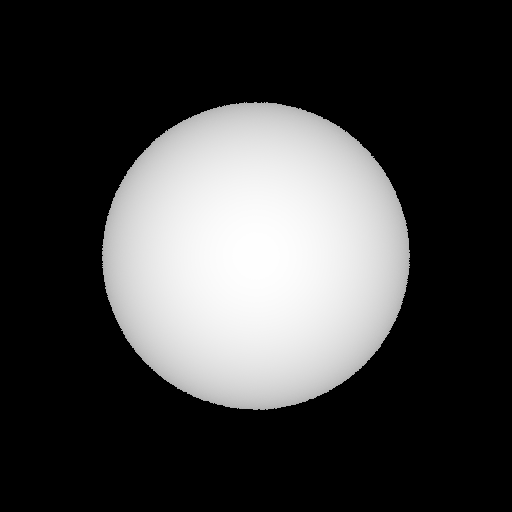

In [6]:
# check the terminal window running iPython for progress
cmd = "echo 16 0 0 100000 200000 200000 512 512 1 output/heightmap.hips | \
       start sphere.obj"
os.system(cmd)

# the .hips image can be converted (using tools shipped with librat andImageMajick) 
# to something that can be displayed here
cmd = "linear < output/heightmap.hips | \
       hips2pbm > output/sphere.pbm | \
       convert output/sphere.pbm output/sphere.png"
os.system(cmd)

from IPython.display import Image 
Image(filename='output/sphere.png')

# compare this with the image above!